![logo](https://www.tec.ac.cr/sites/default/files/media/branding/logo-tec.png "TEC")

# Big Data, Programa de Ciencia de los Datos

## Proyecto Final

### Entregable #2: Proyecto programado

* Esteban Sáenz Villalobos (**esaenz7@gmail.com**).
* Entrega: 6 de septiembre 2021, 23:00.
* Valor: 20%.

---

## Objetivo

Aplicar técnicas para extracción, transformación, carga de datos realistas de la vida cotidiana y generar predicciones a partir de esos datos depurados.

## Resultados esperados para esta asignación

La realización de este proyecto busca que los estudiantes se expongan a las complejidades que implican obtener datos reales que provienen de múltiples fuentes. Se espera que realicen una investigación preliminar donde buscarán conjuntos de datos, abiertos o de su ámbito laboral, que provengan de múltiples fuentes. Posteriormente, deberán preprocesar e integrarlos de manera que puedan ser utilizados para propósitos analíticos y predictivos. Los resultados serán presentados en la clase final del módulo.

---

## Entrega

Repositorio de código que incluye configuración de contenedores, código en
Python con pruebas, Jupyter Notebook (dentro del repositorio de manera opcional), análisis de resultados y Archivo PDF con instrucciones de ejecución en TEC Digital a más tardar el Lunes 6 de Setiembre de 2021 a las 11:00PM.

Una vez que se haya escogido los dos (o más) conjuntos de datos y se haya definido el objetivo de predicción, se procederá a la implementación de todo el código para respaldarlo. El desglose funcional y por puntaje es:

  * Cargado y preprocesamiento de datos (antes de cruzarlos). Se espera que los
estudiantes desarrollen módulos en Python para cargar los datos escogidos y ajustarlos de manera que sean fáciles de utilizar en la fase de predicción posterior. Este apartado cubre el desarrollo del código para cargarlos y crear las transformaciones de Spark necesarias a nivel de dataframe. Al no incluir escritura a la base de datos, en este punto, los estudiantes deberán realizar todas las pruebas unitarias necesarias para demostrar que los datos han sido cargados y preprocesados correctamente. La evaluación de esta sección se enfocará mayoritariamente en las pruebas. (7%)

  * Materialización en PostgreSQL. Una vez que los datos estén preparados, deberán
escribirse a una base de datos PostgreSQL, utilizando el esquema de contenedor
secundario. Para ello se desarrollará un programa principal en Python, cuyo uso deberá documentarse detalladamente en el PDF de instrucciones. Este programa utilizará todos los módulos anteriores y agrega la funcionalidad necesaria para escribir los conjuntos de datos antes y después de cruzados. Se espera que la estructura de la base de datos sea expuesta con claridad en las instrucciones, ya que la validación para calificación incluirá correr consultas SQL. Para ello se requiere entender la estructura. (3%)

  * Modelo de predicción. Se deberá desarrollar al menos dos modelos de predicción,
utilizando las bibliotecas de aprendizaje automático de Spark, sobre el objetivo planteado en el primer entregable de este proyecto. Los elementos típicos para el
desarrollo correcto de modelos (vistos en el módulo de aprendizaje) aplicarán aquí. Se deberá generar un programa principal que se pueda ejecutar desde el contenedor con suficiente información de rastreo para determinar que la implementación fue realizada correctamente. En esta sección se permite que los estudiantes utilicen Jupyter notebooks, agregados al repositorio de código entregado. En caso de utilizar esta opción, los estudiantes deberán agregar la configuración necesaria al Dockerfile entregado para que sea accesible desde la máquina real. Para cualquiera de las dos alternativas, deberá ser documentado, en detalle, en el PDF de documentación que se entregará. Todos los pasos para reproducir la ejecución del modelo deberán ser explicados en la misma. (7%)

  * Análisis de resultados. Derivado del entrenamiento de modelos, deberá analizarse los resultados de cada uno por separado, primero, y posteriormente una comparación entre ambos. Debe explicarse con detalle por qué alguno funciona mejor o no. Se deja a criterio de los estudiantes agregar cualquier elemento que consideren enriquezca este análisis de resultados. (3%)

---

# Índice

*   Parte I

  * Acerca del problema.
    
      * Objetivo del proyecto.

      * Descripción general de los conjuntos de datos.

      * Estrategia del proyecto.

*   Parte II

  * Carga, pre-procesamiento, visualización, ingeniería de características y almacenamiento.

  * Ejecución y pruebas unitarias.

  * Jupyter Notebook.

      * Modelos: regresión logística y bosques aleatorios.

      * Entrenamiento.

      * Evaluación.

  * Análisis de resultados y conclusiones.

---

## Objetivo del proyecto y descripción general de los conjuntos de datos

![flights banner](https://drive.google.com/uc?export=view&id=1cxwjNU-QgNu1i7fsQCC9FqM-Ec-DNJBx)

* Nombre del proyecto: ***Predicción de vuelos demorados para el sector aeronáutico doméstico de los EEUU***.

* Objetivo predictivo: el proyecto tiene como objetivo general utilizar las técnicas de ETL y aprendizaje automático para poder predecir, por medio del modelado de patrones a partir de un sub-conjunto de entrenamiento, ***el estado de un vuelo en particular, siendo este clasificado de forma binaria como: "a tiempo" o "demorado"***, para lo cual se validará dicho modelo a través de un sub-conjunto de prueba cuyos resultados serán utilizados para la obtención de métricas específicas que permitan analizar su rendimiento.

* Ruta:

    a) Realizar la carga, exploración, análisis, filtrado y limpieza de datos correspondiente para cada dataset.

    b) Determinar a partir de la columna de demora en el arribo "arr_delay", el valor de tiempo que permitirá realizar la clasificación binaria entre un vuelo demorado y un vuelo a tiempo.
    
    c) Definir la columna correspondiente para dichas clases. La columna objetivo o "target" se llamará "**delayed**" y contendrá el valor booleano para las 2 clases posibles de resultados: "demorado" o "a tiempo".

    d) Relizar la unión de los datasets a partir de las columnas correspondientes según se detalla con el siguiente pseudocódigo (algunos nombres de columnas son modificados durante la fase de preparación para facilitar su uso):

      # dataframe -> join(flights.origin == airports.iata)
      # dataframe -> join(airports.icao == weather.airportcode 
                          & flights.date == weather.date)

  En este caso se realizará la unión de los conjuntos de datos principales de vuelos ("flights") y eventos meterológicos ("weather") por medio de un dataset intermedio con la lista de aeropuertos ("airports"), el cual posee los códigos IATA e ICAO que utilizan respectivamente los datasets principales. Además se incorpora una llave adicional entre fechas, para mantener la relación del vuelo con el evento meteorológico reportado según el día en particular.

    e) Filtrar y preparar las columnas y sub-conjuntos para el proceso de aprendizaje automático.

    f) Entrenar los modelos de clasificación seleccionados.

    g) Medir y analizar el rendimiento de cada modelo aplicado.
    
    h) Realizar los ajustes que se consideren pertinentes y repetir los pasos f y g.

* Contexto y alcance: el proyecto tiene como contexto los vuelos domésticos registrados en EEUU durante el año 2018, al cual se adjuntan los registros de eventos meteorológicos y su severidad ocurridos para cada día del año y para cada aeropuerto en particular. Ambos datasets son unidos gracias al conjunto de datos proporcionado por la lista extensa de aeropuertos del repositorio "openflights.org" el cual aporta tanto el código IATA (International Air Transport Association) utilizado coloquialmente para el manejo de vuelos comerciales, como el código oficial ICAO (International Civil Aviation Organization) utilizado para identificar las estaciones de medición meteorológica.

* Limitaciones: en cuanto a su diseño, desarrollo e implementación del modelo de aprendizaje automático, el proyecto comprende todos los requerimientos establecidos y se encuentra limitado básicamente por la capacidad computacional del equipo utilizado.

* Fuentes de datos analizadas: el proyecto está basado en los datos de 2 archivos CSV y 1 archivo DAT, provenientes de 2 fuentes distintas de dominio público.
  
  * Kaggle

    1. [Airline Delay and Cancellation Data, 2018](https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv) [archivo "***2018.csv -> flights.csv***"]. La Oficina de Estadísticas de Transporte del Departamento de Transporte de los EE. UU. (DOT) rastrea el desempeño puntual de los vuelos nacionales operados por grandes compañías aéreas. La información resumida sobre el número de vuelos puntuales, retrasados, cancelados y desviados se publica en este conjunto de datos de vuelos de 2018.
    2. [US Weather Events (2018)](https://www.kaggle.com/sobhanmoosavi/us-weather-events) [archivo "***WeatherEvents_Jan2016-Dec2020.csv -> weather.csv***"].Se trata de un conjunto de datos de eventos meteorológicos de todo EEUU que incluye 6,3 millones de eventos y cubre 49 estados. Los datos se recopilan desde enero de 2016 hasta diciembre de 2020, utilizando informes meteorológicos históricos que se recopilaron de 2,071 estaciones meteorológicas en aeropuertos en todo el país.

  * Openflights

    1. [Open data downloads](https://openflights.org/data.html) [archivo "***airports.dat -> airports.csv***"]. La base de datos de aeropuertos de OpenFlights contiene más de 10,000 aeropuertos, estaciones de tren y terminales de ferry en todo el mundo.

* Descripción detallada: a continuación se procede a realizar un análisis descriptivo de los datos por medio de códificación y visualizaciones.

--- 

### Glosario

	fl_date: fecha del vuelo.
    op_carrier: identificador de la aerolínea.
    origin: código de aeropuerto de salida.
    dest: código del aeropuerto de destino.
    crs_dep_time: hora de salida planificada.
    dep_time: hora real de salida.
    dep_delay: retraso total a la salida en minutos.
    taxi_out: el tiempo transcurrido entre la salida de la puerta del aeropuerto de origen y el despegue.
    wheels_off: el momento en el que las ruedas de la aeronave abandonan el suelo.
    wheels_on: el momento en el que las ruedas de la aeronave tocan el suelo.
    taxi_in: el tiempo transcurrido entre el aterrizaje y la llegada a la puerta del aeropuerto de destino.
    crs_arr_time: hora prevista de llegada.
    arr_time: hora de llegada real = hora de llegada - llegada_programada.
    arr_delay: retraso total a la llegada en minutos.
    cancelled: vuelo cancelado (1 = cancelado).
    diverted: aeronave aterrizó en un aeropuerto diferente al programado.
    crs_elapsed_time: cantidad de tiempo planificada necesaria para el viaje de vuelo.
    actual_elapsed_time: tiempo_aire + taxi_in + taxi_out.
    air_time: la duración de tiempo entre wheels_off y wheels_on time.
    distance: distancia entre dos aeropuertos.
    severe-cold: el caso de tener una temperatura extremadamente baja, con temperatura por debajo de los -23,7 grados centígrados.
    fog: el caso en el que hay una condición de baja visibilidad como resultado de la niebla o neblina.
    hail: el caso de tener precipitaciones sólidas que incluyen gránulos de hielo y granizo.
    rain: el caso de tener lluvia, que va de ligera a fuerte.
    snow: el caso de tener nieve, que va de ligera a fuerte.
    storm: la condición de mucho viento, donde la velocidad del viento es de al menos 60 km / h.
    other precipitation: cualquier otro tipo de precipitación que no pueda asignarse a los tipos de eventos descritos anteriormente.
    iata: código IATA de 3 letras, si está disponible.
    icao: código ICAO de 4 letras, si está disponible.

---

## Estrategia del proyecto

* Ambiente de ejeución

  * Contenerización con Docker
  
  <div><img src="https://drive.google.com/uc?export=view&id=19NPwcsU1IRkmmFrfQpAOYD9SpzrME9II" width="700"/></div>

* Proceso de machine learning (ciclo de vida)

<div><img src="https://drive.google.com/uc?export=view&id=1YBLbLdBaPid5y9XXWNDMm2msuA4wKWAu" width="700"/></div>

* Preparación de los datos e ingeniería de características

  * Técnicas de análisis y selección de variables de interés, imputación de valores nulos, indexación y codificación de colummnas categóricas, además de estandarización de los datos y almacenamiento en base de datos.

  * Base de datos

    Postgres <div><img src="https://drive.google.com/uc?export=view&id=1NZtyUlptLmQ5X8vzGip9cOm__UevjKep" width="700"/></div>
    
    Las tablas tb_flights, tb_airports y tb_weather corresponden a los conjuntos de datos individuales. La tabla tb_proyecto continene los 3 conjuntos de datos ensamblados previo al pre-procesamiento.
    
    La tabla tb_proyectoml corresponden al conjunto de datos preparado después del proceso de ingeniería de características.

    Las tablas tb_modelolr y tb_modelorf contienen las etiquetas, predicciones y probabilidades, resultado de la evaluación de cada modelo con el conjunto de prueba.

* Partición de los datos

  * Separación training-test con una relación 70/30.

* Modelos

  * Regresión logística

    Es un modelo de aprendizaje que crea una superficie de decisión lineal realizando suposiciones de probabilidad y alterando los pesos mediante un enfoque de máxima verosimilitud.

  <div><img src="https://drive.google.com/uc?export=view&id=1UB50E6q5fe8ZnRbQsAauF5U2PxXrtGmX" width="700"/></div>

  * Bosques aleatorios

    Es una combinación de árboles de decición tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. Es una modificación sustancial de bagging que construye una larga colección de árboles no correlacionados y luego los promedia.

  <div><img src="https://drive.google.com/uc?export=view&id=1yplZYKLAzMCKlKgUntkzMIhApm3MdhRS" width="700"/></div>

* Entrenamiento

  * Técnica de validación cruzada mediante K-Fold, con utilización de grillas paramétricas y evaluación del mejor modelo mediante métricas de AUC.

* Evaluación de los modelos de aprendizaje

<div><img src="https://drive.google.com/uc?export=view&id=1ynIWIYFOoJQQ6o2eJzBw7NEuqCD1xu4E" width="700"/></div>

  * ROC

    La tasa de verdaderos positivos (sensibilidad) describe qué tan bueno es el modelo para predecir la clase positiva cuando el resultado real es positivo. El AUC es útil para describir la habilidad del modelo (asignar una probabilidad más alta a una ocurrencia positiva real elegida al azar que a una ocurrencia negativa en promedio).

  * PR

    "Precision" describe qué tan bueno es un modelo para predecir la clase positiva, se conoce como valor predictivo positivo. "Recall" es lo mismo que la sensibilidad. Esta métrica es útil en los casos en que existe un desequilibrio en las observaciones entre las dos clases, hay muchos ejemplos clase 0 y solo algunos ejemplos clase 1.
    
    El F1 score calcula la media armónica del PR. El AUC resume la integral o una aproximación del área bajo la curva.

---

## Carga de datos

21/09/06 03:57:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).



 Conjunto cargado desde base de datos [ 10.7.84.102 5432 ] 
 Visualizaciones 



Mapa de calor


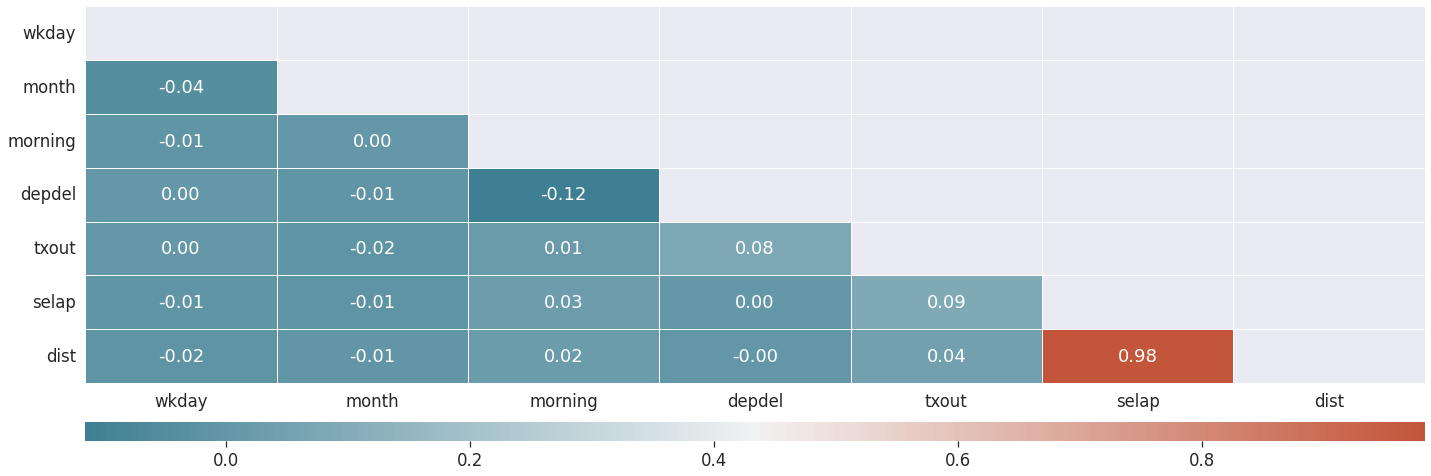


Gráfico de parcela


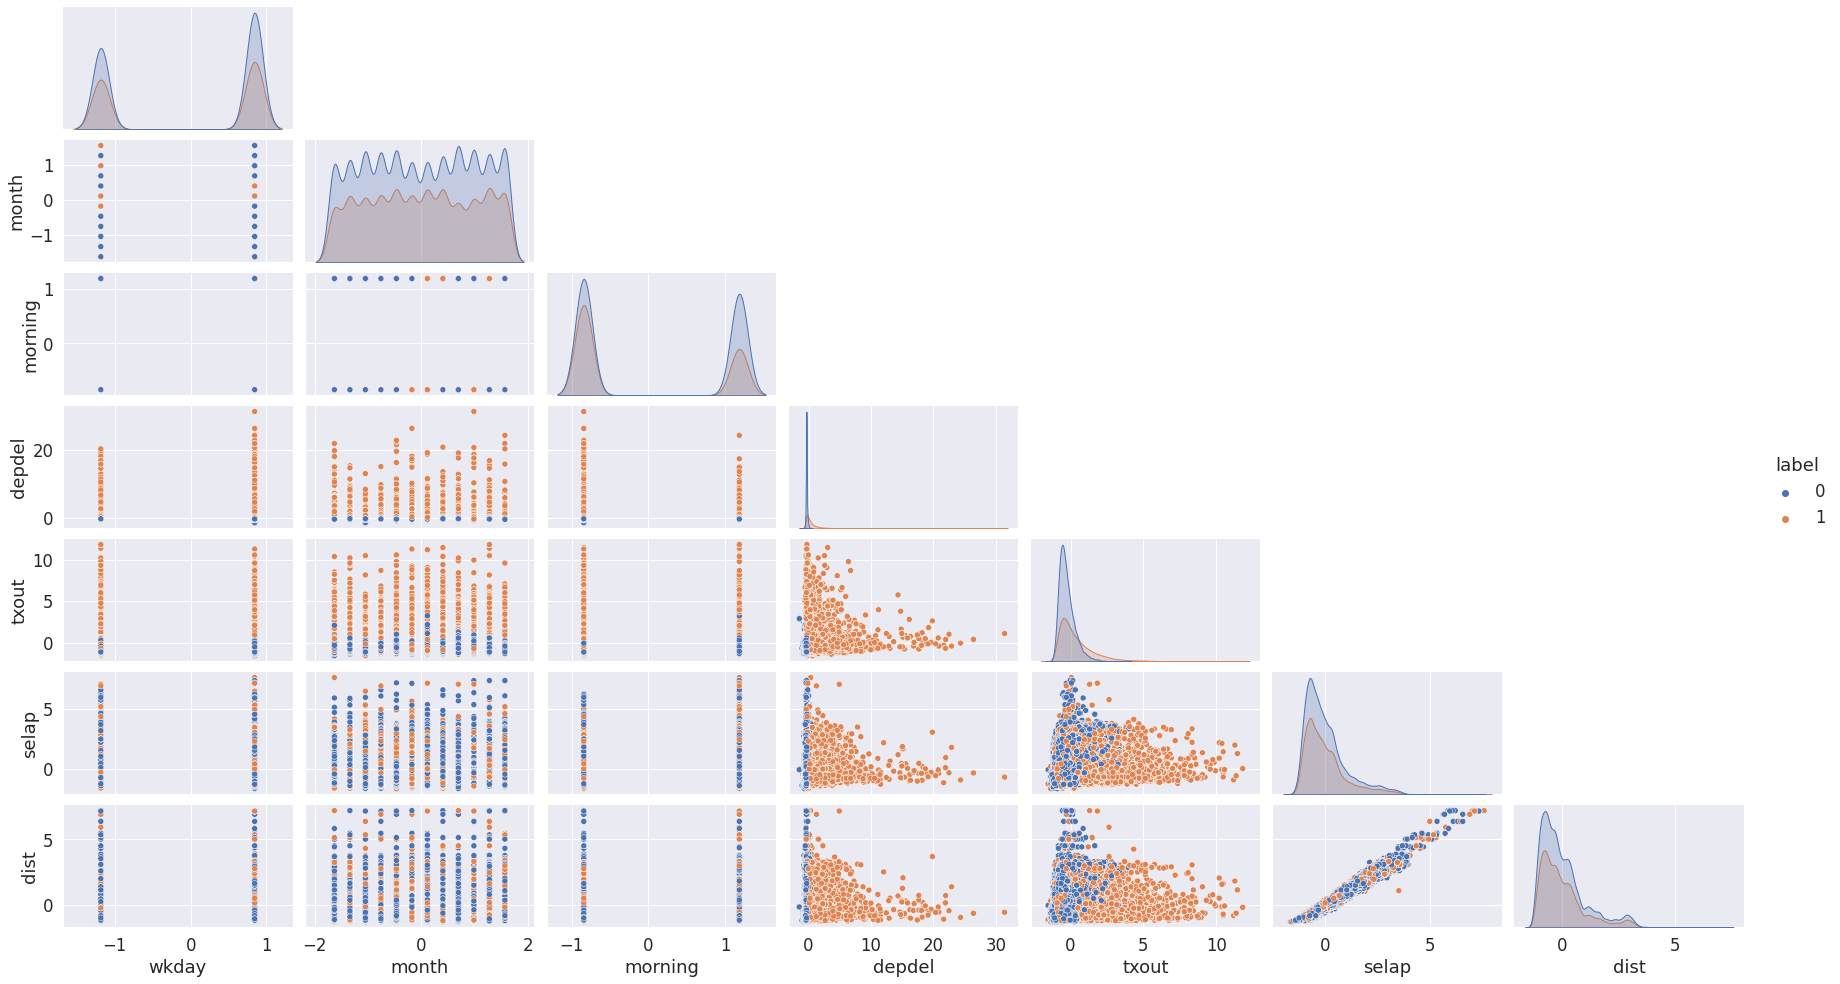


 Conjunto de datos vectorizado para proceso de ml 


+--------------------+-----+
|              scaled|label|
+--------------------+-----+
|[0.53425287028633...|  1.0|
|[0.10762112818071...|  1.0|
|[-0.2580632221955...|  0.0|
|[-0.2580632221955...|  0.0|
|[-0.2580632221955...|  0.0|
|[-0.2580632221955...|  0.0|
|[0.27014750612571...|  1.0|
|[-0.2580632221955...|  1.0|
|[-0.0752210470074...|  0.0|
|[-0.3596422084111...|  0.0|
+--------------------+-----+
only showing top 10 rows

root
 |-- scaled: vector (nullable = true)
 |-- label: double (nullable = true)



In [1]:
#librerías
from recursos import *
#leer de base de datos
#se carga la tabla tb_proyecto para presentar algunas visualizaciones y la tabla tb_proyectoml para aplicar los modelos de aprendizaje
df_ft = (leer_df(table='tb_proyecto'), leer_df(table='tb_proyectoml'))

sf1, sf2, ef = '\n\033[1m\033[103m\033[30m', '\n\033[1m\033[106m\033[30m', '\033[0m'
print(sf1, 'Conjunto cargado desde base de datos', '[', host, port, ']', sf2, 'Visualizaciones', ef)
plot_corr(df_ft[0].select('wkday','month','morning','depdel','txout','selap','dist','label'), inputcols=['wkday','month','morning','depdel','txout','selap','dist'])
dfml = cols2vec(df_ft[1], inputcols=df_ft[1].columns[:-1], outputcol='scaled')
print(sf2, 'Conjunto de datos vectorizado para proceso de ml', ef)
dfml.show(10)
dfml.printSchema()

In [2]:
# !pip install -U pandas-profiling #restart kernel
# import pandas_profiling #visualización de datos a través de la librería pandas_profiling
# df_pd = df_ft[0].select('carrier','wkday','month','morning','wtyp','wsev','depdel','txout','selap','dist','label')
# profile = pandas_profiling.ProfileReport(df_jn.toPandas(), title="Proyecto_BigData", html={"style": {"full_width": True}}, sort=None).to_file("/content/proyecto.html")

### Detalles acerca de las visualizaciones presentadas

  * Los valores presentados en las visualizaciones corresponden al conjunto de datos principal pre-procesado y estandarizado.

  * El mapa de calor permite observar la correlación ya sea directa o inversa entre las distintas variables numéricas del conjunto de datos.En este caso se observa un valor significativo (cercano a 1) entre la variable "dist" (distancia) y la variable "selap" (tiempo transcurrido), lo cual es esperado por la naturaleza de dichas características puesto que a mayor desplazamiento mayor será el tiempo empleado. En cuanto al resto de columnas no se aprecian otros valores significativos.

  * El gráfico de parcela, por un lado permite observar a través de su diagonal los histogramas correspondientes a cada columna individualmente y su posible función de distribución asociada, sea normal, exponencial, gamma, etc. Además, los diagramas de dispersión ayudan a realizar un análisis más detallado y visual acerca de la correlación y el aporte de variabilidad (información) asociado a cada par de variables y en este caso a cada clase de la columna objetivo "label", la cual está representada por cada color (azul=0, naranja=1).

  * Se puede confirmar la alta correlación vista en el mapa de calor con el gráfico de dispersión "selap/dist". Los gráficos de las variables nominales como "wday" (define si es un día entre semana o no), "month" (define el mes del año), "morning" (define si es antes o después del medio día), ayudan a determinar la separación correcta de las categorías y el comportamiento de las clases objetivo respecto a ellas. En el caso de la dispersión mostrada por la columna "depdel" (retraso en la salida), la separación de clases es muy evidente debido a que por lo general los retrasos en la salida de los despegues implican un retraso en la llegada, la cual corresponde a la variable objetivo, sin embargo esto no es una regla general y muchos de los vuelos logran reponer el tiempo perdido durante el transcurso del viaje.

  * [Visualizaciones mediante Pandas Profiling](https://drive.google.com/uc?export=download&id=16PZGlG9lX18ncbPUkG8FLfA5UMCepBEH)

---

## Entrenamiento (training)

---

In [3]:
'''
Determinaciones:
+ Se eligen 2 modelos de clasificación
  * Regresión logística
  * Bosques aleatorios
+ Se utiliza la técnica de validación cruzada "K-fold" para la parametrización, ajuste y análisis de los modelos
'''

#separación de datos: entrenamiento vs prueba (relación 70/30) se elije la separación aleatoria simple en lugar de la estratificada
# dftrain = dfml.stat.sampleBy('label', {0: 0.7, 1: 0.7}, seed=999)
# dftest = dfml.subtract(dftrain)
dftrain, dftest = dfml.randomSplit([.7,.3], seed=999) #separación del conjunto principal en datos de entrenamiento y prueba
dfsmall = dftrain.sample(False, 0.1, seed=999).cache() #muestra pequeña del conjunto de entrenamiento para realizar ajustes
print('Total de observaciones')
dfml.groupBy('label').count().show()
print('Entrenamiento')
print('Fracción: {:.2%}'.format(dftrain.count()/dfml.count()))
dftrain.groupBy('label').count().show()
print('Prueba')
print('Fracción: {:.2%}'.format(dftest.count()/dfml.count()))
dftest.groupBy('label').count().show()

#parametrización y ajustes del modelo
#logistic regression
pca_mod = PCA(inputCol='scaled', outputCol='pca')
lr_mod = LogisticRegression(featuresCol='pca', labelCol='label')
lr_estimador = pipe(stages=[pca_mod,lr_mod])
lr_grid = ParamGridBuilder()\
                            .addGrid(pca_mod.k, [10, 25, len(df_ft[1].columns[:-1])])\
                            .addGrid(lr_mod.maxIter, [5, 15, 25])\
                            .addGrid(lr_mod.threshold, [.5, .6])\
                            .build()
lr_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
lr_cv = CrossValidator(estimator=lr_estimador, estimatorParamMaps=lr_grid, evaluator=lr_evaluator, numFolds=5)

#parametrización y ajustes del modelo
#random forest
pca_mod = PCA(inputCol='scaled', outputCol='pca')
rf_mod = RandomForestClassifier(featuresCol='pca', labelCol='label')
rf_estimador = pipe(stages=[pca_mod,rf_mod])
rf_grid = ParamGridBuilder()\
                            .addGrid(pca_mod.k, [10, 25, len(df_ft[1].columns[:-1])])\
                            .addGrid(rf_mod.numTrees, [25, 50])\
                            .addGrid(rf_mod.impurity, ['entropy', 'gini'])\
                            .build()
rf_evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
rf_cv = CrossValidator(estimator=rf_estimador, estimatorParamMaps=rf_grid, evaluator=rf_evaluator, numFolds=5)

Total de observaciones


+-----+-----+
|label|count|
+-----+-----+
|  0.0|61269|
|  1.0|39736|
+-----+-----+

Entrenamiento


Fracción: 70.23%


+-----+-----+
|label|count|
+-----+-----+
|  0.0|42922|
|  1.0|28016|
+-----+-----+

Prueba


Fracción: 29.77%


+-----+-----+
|label|count|
+-----+-----+
|  0.0|18347|
|  1.0|11720|
+-----+-----+



In [4]:
#modelado con muestra pequeña para ajuste de parámetros
# %time lr_cvmodel = lr_cv.fit(dfsmall)
# %time rf_cvmodel = rf_cv.fit(dfsmall)

#modelado con conjunto de entrenamiento
%time lr_cvmodel = lr_cv.fit(dftrain)
%time rf_cvmodel = rf_cv.fit(dftrain)

CPU times: user 5 s, sys: 1.05 s, total: 6.04 s
Wall time: 3min 58s


CPU times: user 4.39 s, sys: 876 ms, total: 5.26 s
Wall time: 6min 34s


In [5]:
#resultados de las estimaciones y mejor estimación
sf1, sf2, ef = '\n\033[1m\033[106m\033[30m', '\n\033[1m\033[103m\033[30m', '\033[0m'
print('Resultados de la evaluación cruzada K-Fold')
print(sf2, 'Regresión logística', ef, lr_cvmodel.getEstimator())
print(sf1, 'Estimaciones realizadas', ef,' '.join('[{}: {:.2f}]'.format(*k) for k in enumerate(lr_cvmodel.avgMetrics)))
print(sf1, 'Mejor estimación', ef, lr_cvmodel.getEstimatorParamMaps()[np.argmax(lr_cvmodel.avgMetrics)], '\n')
print(sf2, 'Bosques aleatorios', ef, rf_cvmodel.getEstimator())
print(sf1, 'Estimaciones realizadas', ef,' '.join('[{}: {:.2f}]'.format(*k) for k in enumerate(rf_cvmodel.avgMetrics)))
print(sf1, 'Mejor estimación', ef, rf_cvmodel.getEstimatorParamMaps()[np.argmax(rf_cvmodel.avgMetrics)], '\n')

Resultados de la evaluación cruzada K-Fold

 Regresión logística  Pipeline_b719af3abe71

 Estimaciones realizadas  [0: 0.74] [1: 0.74] [2: 0.74] [3: 0.74] [4: 0.74] [5: 0.74] [6: 0.77] [7: 0.77] [8: 0.77] [9: 0.77] [10: 0.77] [11: 0.77] [12: 0.91] [13: 0.91] [14: 0.92] [15: 0.92] [16: 0.92] [17: 0.92]

 Mejor estimación  {Param(parent='PCA_fc70a720ed19', name='k', doc='the number of principal components'): 39, Param(parent='LogisticRegression_2ff01ba9c790', name='maxIter', doc='max number of iterations (>= 0).'): 25, Param(parent='LogisticRegression_2ff01ba9c790', name='threshold', doc='Threshold in binary classification prediction, in range [0, 1]. If threshold and thresholds are both set, they must match.e.g. if threshold is p, then thresholds must be equal to [1-p, p].'): 0.5} 


 Bosques aleatorios  Pipeline_1f36166901be

 Estimaciones realizadas  [0: 0.75] [1: 0.76] [2: 0.76] [3: 0.76] [4: 0.77] [5: 0.76] [6: 0.77] [7: 0.77] [8: 0.78] [9: 0.79] [10: 0.79] [11: 0.79]

 Mejor estima

## Evaluación (test)

---

In [6]:
#predicciones con conjunto de prueba
%time lr_predic = lr_cvmodel.transform(dftest).collect()
random.shuffle(lr_predic)
%time rf_predic = rf_cvmodel.transform(dftest).collect()
random.shuffle(rf_predic)

#métricas
scp = lambda x: spark.sparkContext.parallelize([(float(i[0]),float(i[1])) for i in x], 2)
#bcm = lambda x: BinaryClassificationMetrics(x, scoreCol='probability', labelCol='label')
lr_metrics = BinaryClassificationMetrics(spark.sparkContext.parallelize(list((float(i[1]),float(i[5])) for i in lr_predic), 2))
lr_report = classification_report(list(i[1] for i in lr_predic), list(i[5] for i in lr_predic))
rf_metrics = BinaryClassificationMetrics(spark.sparkContext.parallelize(list((float(i[1]),float(i[5])) for i in rf_predic), 2))
rf_report = classification_report(list(i[1] for i in rf_predic), list(i[5] for i in rf_predic))

CPU times: user 2.5 s, sys: 67.9 ms, total: 2.57 s
Wall time: 6.27 s


CPU times: user 2.3 s, sys: 69 ms, total: 2.37 s
Wall time: 6.23 s


Resultados de las evaluaciones para las predicciones obtenidas con el conjunto de prueba

 Regresión logística 
 Reporte de clasificación  
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     18347
         1.0       0.89      0.76      0.82     11720

    accuracy                           0.87     30067
   macro avg       0.87      0.85      0.86     30067
weighted avg       0.87      0.87      0.87     30067


---AUC ROC: 87.47%---	---AUC PR 73.83%---



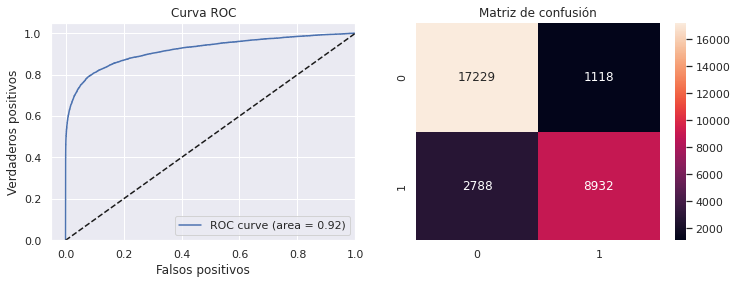



 Bosques aleatorios 
 Reporte de clasificación  
               precision    recall  f1-score   support

         0.0       0.71      0.96      0.82     18347
         1.0       0.87      0.39      0.54     11720

    accuracy                           0.74     30067
   macro avg       0.79      0.68      0.68     30067
weighted avg       0.77      0.74      0.71     30067


---AUC ROC: 79.02%---	---AUC PR 37.42%---



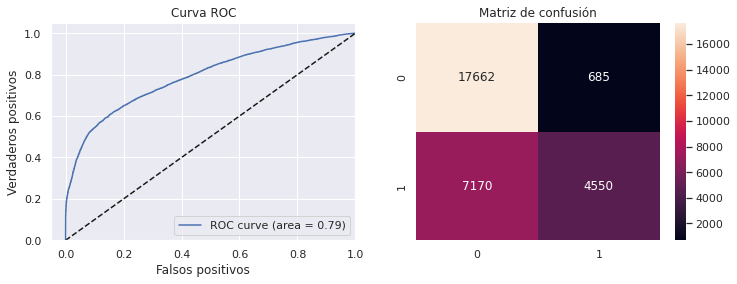

In [12]:
#resultados
sf1, sf2, ef = '\n\033[1m\033[106m\033[30m', '\n\033[1m\033[103m\033[30m', '\033[0m'
print('Resultados de las evaluaciones para las predicciones obtenidas con el conjunto de prueba')
print(sf1, 'Regresión logística', '\n Reporte de clasificación', ef, '\n', lr_report)
print('{}---AUC ROC: {:.2%}---\t---AUC PR {:.2%}---{}\n'.format(sf2, lr_metrics.areaUnderROC, lr_metrics.areaUnderPR, ef))
print(''.format(plot_metrics(lr_predic, ver=1)[0]))
print(sf1, 'Bosques aleatorios', '\n Reporte de clasificación', ef, '\n', rf_report)
print('{}---AUC ROC: {:.2%}---\t---AUC PR {:.2%}---{}\n'.format(sf2, rf_metrics.areaUnderROC, rf_metrics.areaUnderPR, ef))
print(''.format(plot_metrics(rf_predic, ver=1)[0]))


 Regresión logística 


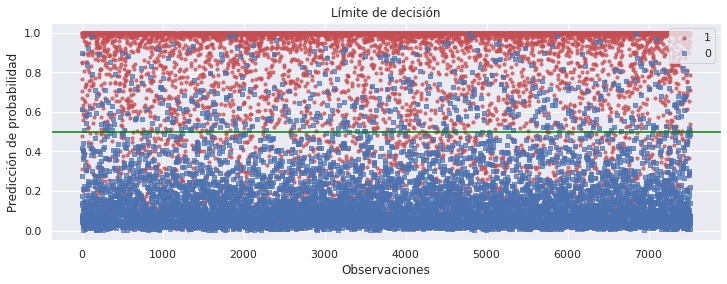


 Bosques aleatorios 


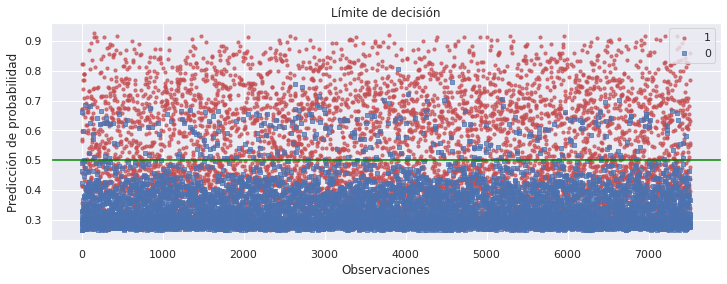

In [8]:
#visualizaciones
print(sf1, 'Regresión logística', ef)
plot_bound(np.array(list(i[4][1] for i in lr_predic if i[1]==1)), 
           np.array(list(i[4][1] for i in lr_predic if i[1]==0)), int(len(lr_predic)/2*0.5))
print(sf1, 'Bosques aleatorios', ef)
plot_bound(np.array(list(i[4][1] for i in rf_predic if i[1]==1)), 
           np.array(list(i[4][1] for i in rf_predic if i[1]==0)), int(len(rf_predic)/2*0.5))

In [9]:
#almacenamiento de modelos (opcional en caso que se deseen almacenar localmente)
# lr_cvmodel.write().overwrite().save('/'+str(lr_cvmodel.getEstimator()))
# rf_cvmodel.write().overwrite().save('/'+str(rf_cvmodel.getEstimator()))

#escritura de los resultados de las predicciones para cada modelo y lectura desde la base de datos para confirmación
for dfin,tb,mod in zip([spark.sparkContext.parallelize(lr_predic).toDF(), 
                        spark.sparkContext.parallelize(rf_predic).toDF()],
                       ['tb_modelolr','tb_modelorf'], ['LR','RF']):
  dfin = vec2cols(dfin, inputcol='scaled', outputcols=df_ft[1].columns[:-1],
                  label='label', lab_alias='label', print_=False, prediction='prediction')
  #almacenamiento en base de datos
  escribir_df(df=dfin, table=tb)
  #lectura desde base de datos
  dfout = leer_df(table=tb)
  print('Modelo: ', mod, '\tTabla: ', tb, sep='')
  dfout.show(5, truncate=False)
  dfout.printSchema()

Modelo: LR	Tabla: tb_modelolr
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+---------------------+--------------------+-------------------+-------------------+------------------+--------------------+--------------------+-------------------+---------------------+-----+----------+
|depdel              |txout               |selap               |dist                |carrier_1           |carrier_2           |carrier_3           |carrie

Modelo: RF	Tabla: tb_modelorf
+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+-----------------+-------------------+--------------------+---------------------+--------------------+-------------------+-------------------+------------------+--------------------+--------------------+-------------------+---------------------+-----+----------+
|depdel              |txout               |selap              |dist               |carrier_1           |carrier_2           |carrier_3           |carrier_4   

---

## Análisis de resultados y conclusiones

  * Se realizó la carga, pre-procesamiento, ingeniería, almacenamiento en base de datos, entrenamiento y evaluación de 3 conjuntos de datos ensamblados, con poco más de 100 mil observaciones en total y 4 columnas numéricas más 6 columnas categóricas de atributos (antes de la codificación nominal), con una columna binaria de clases 1 y 0.

  * A partir del conjunto de datos almacenado se realizó una separación para entrenamiento y prueba con una relación 70/30, para luego aplicar un proceso de aprendizaje automático supervisado utilizando 2 modelos de clasificación: Regresión logística y Bosques aleatorios.

  * El entrenamiento de los modelos fue evaluado a través de la técnica de validación cruzada K-Fold y utlizando diferentes parametrizaciones en cada modelo por medio de una grilla paramétrica. K-fold realiza la selección del modelo al dividir el conjunto de datos aleatoriamente en partes que no se superponen y asignadas como conjuntos de prueba y entrenamiento separados. Gracias a esto no solo se logra estimar la habilidad de cada modelo, sino también cuál de todas las combinaciones paramétricas resultó mejor para cada uno.

  * La evaluación en entrenamiento da un resultado más favorable para el modelo de **Regresión logística** cuyo mejor modelo alcanza un **92%**, el algoritmo de **Bosques aleatorios** consigue hasta un **79%** en su mejor estimación. Además se obtuvieron los tiempos de ejecución para cada uno.
  
  * A continuación se muestran los tiempos de ejecución durante la fase de entrenamiento para cada modelo, todos realizados en el mismo ambiente y con el mismo conjunto de datos. El procesamiento para la Regresión logística requiere de un menor tiempo, por lo que su rendimiento final es mejor en comparación con el otro modelo.

        Regresión logística
        # CPU times: user 5 s, sys: 1.05 s, total: 6.04 s
        # Wall time: 3min 58s
        Bosques aleatorios
        # CPU times: user 4.39 s, sys: 876 ms, total: 5.26 s
        # Wall time: 6min 34s 

  * Por otra parte, se ejecutó una etapa de evaluación con el conjunto de prueba con un reporte de resultados utilizando el módulo de Classification_report de spark.mllib, el cual permite mostrar las diferentes métricas de rendimiento en clasificación de clases comparando los resultados de las predicciones de cada modelo con las etiquetas correspondientes a cada observación.

  * Dentro de las métricas obtenidas se encuentran "Precision", "Recall", "F1-score".

  * Esta evaluación contempla el análisis tanto del **ROC** el cual muestra la compensación entre la tasa de verdaderos positivos y la tasa de falsos positivos, como del **Precision-Recall** que analiza la compensación entre la tasa positiva verdadera y el valor predictivo positivo; ambos utilizando diferentes umbrales de probabilidad para cada modelo.

  * Dado que las clases en el conjunto de datos están aceptablemente balanceadas se prefiere el uso del **ROC** para efectos de decidir cuál de los 2 modelos aporta mejor pronóstico probabilístico. En este caso el modelo de Regresión logística brinda un pronóstico con un resultado del 87%, el cual está por encima del modelo de Bosques aleatorios que alcanza hasta un 79%.

  * Se considera que el modelo de Regresión logística al ser un modelo más simple que crea una superficie de decisión lineal realizando suposiciones de probabilidad y alterando los pesos mediante un enfoque de máxima verosimilitud, permite alcanzar mejores resultados para las características particulares del conjunto de datos y del problema planteado. Mientras que el modelo de Bosques aleatorios parece estar realizando un sobreajuste que provoca una alta taza de falsos negativos.

  * La curva ROC y la matriz de confusión también permiten apreciar visual y cuantitativamente la habilidad de predicción de cada modelo según la clase objetivo.

  * Finalmente se muestra un gráfico de dispersión con la probabilidad predicha para **n** cantidad observaciones versus su valor real identificado por medio de una codificación de colores y el límite de decisión aplicado, esto para cada modelo.

  * El proceso y los resultados se condideran satisfactorios.

  * Este trabajo permite mostrar de forma general la ruta que sigue un científico de datos desde la carga inicial de datos, hasta las etapas finales de predicción-evaluación y demuestra como la gran mayoría de los esfuerzos y recursos se centran en la fase de preprocesamiento. Como se dice usualmente, si se alimenta basura se obtendrá basura, de modo tal que los mejores modelos, configurados con los mejores parámetros, obtendrán terribles resultados si se alimentan de forma incorrecta.

### Algunas conclusiones acerca del proyecto

  * Recordar que spark se basa en una ejecución "lazy". Prestar especial atención cuando se trabaja con operaciones desde y hacia bases de datos.

  * Mantener el código ordenado y compacto. Utilizar librerías globales y funciones puras que permitan separar y controlar la ejecución por etapas o procesos.

  * Documentar todo, ya sea a nivel de código o de formatos como markdown.

  * Aprovechar las herramientas de control de cambios y contenerización de ambientes, como GitHub y Docker.

  * Evitar el uso de acciones de pyspark innecesarias o recurrentes como "show" y "count" que ralentizan la ejecución del código.

  * Trabajar con muestras de datos pequeñas para realizar pruebas, pero no olvidar de ejecutar el conjunto completo.

  * Evaluar los modelos de aprendizaje con diferentes parámetros para lograr el mejor rendimiento es importante, pero antes es primordial preparar el conjunto de datos adecuadamente mediante técnicas de ingeniería de características.

  * Las pruebas unitarias deben ser consecuentes con el alcance y los límites del código.

  * Aprovechar la documentación oficial de los desarrolladores de las librerías.

---

# Código para generar HTML/PDF

---

In [10]:
# %%capture
# #opción #1 html
# !pip install nbconvert
# !sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-latex-recommended
# !pip install nb_pdf_template
# !python -m nb_pdf_template.install
# !pip install -U notebook-as-pdf
# !jupyter nbconvert --to html BIGDATA_07_2021_ProyectoFinal_ESV.ipynb #--template classic

# #opción #2 pdf
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('.ipynb')